In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# create a set of random lat and long combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the lats and longs to a list
coordinates = list(lat_lngs)

In [4]:
# create a list for holding cities
cities = []

# id the nearest city for each lat/long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# print city count to confirm sufficient count
len(cities)

624

In [5]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

# url for weather map api
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [6]:
# import time library and datetime mod
import time
from datetime import datetime

## IMPORTANT
If you have to stop and restart coding again later, DO NOT run the next cell.  
Instead, reload the city_data_df from the weather_data/cities.csv file and beginning again below.

In [7]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print('Beginning Data Retrieval')
print('------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all cities in list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create endpoint url w/ each city
    city_url = url + '&q=' + city.replace(' ','+')
    
    # log the url, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # add 1 to record count
    record_count += 1
    
    # run an api req for each of the cities
    try:
        # parse json and retrieve data
        city_weather = requests.get(city_url).json()
        
        # parse out needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # convert date to ISO
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # append city info to city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
    # if error, skip the city
    except:
        print('City not found. Skipping...')
        pass
    
# indicate that data loading is complete
print('------------------------')
print('Data Retrieval Complete.')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | arauca
Processing Record 9 of Set 1 | russkaya polyana
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | san pedro
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | risod
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | valparaiso
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | coihaique
Processing Record 22 of Set 1 | barentsburg
City not f

## START AGAIN HERE
reload city csv as noted above and restart from here

In [8]:
len(city_data)

582

In [9]:
# convert array of dictionaries to pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,62.06,77,84,1.99,AU,2022-01-26 16:12:04
1,Ushuaia,-54.8000,-68.3000,53.26,62,75,28.77,AR,2022-01-26 16:12:04
2,Ribeira Grande,38.5167,-28.7000,63.00,67,75,9.22,PT,2022-01-26 16:12:05
3,Khatanga,71.9667,102.5000,-7.76,87,49,9.51,RU,2022-01-26 16:12:05
4,Hermanus,-34.4187,19.2345,71.80,82,98,14.54,ZA,2022-01-26 16:12:06
5,Dingle,10.9995,122.6711,75.79,93,37,6.44,PH,2022-01-26 16:12:06
6,Busselton,-33.6500,115.3333,64.09,75,100,13.78,AU,2022-01-26 16:12:07
7,Arauca,7.0847,-70.7591,90.72,40,100,8.93,CO,2022-01-26 16:12:07
8,Russkaya Polyana,49.4170,31.9201,23.68,89,100,9.86,UA,2022-01-26 16:12:08
9,Rikitea,-23.1203,-134.9692,78.12,76,3,20.89,PF,2022-01-26 16:12:08


In [10]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [11]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-01-26 16:12:04,-42.8794,147.3294,62.06,77,84,1.99
1,Ushuaia,AR,2022-01-26 16:12:04,-54.8000,-68.3000,53.26,62,75,28.77
2,Ribeira Grande,PT,2022-01-26 16:12:05,38.5167,-28.7000,63.00,67,75,9.22
3,Khatanga,RU,2022-01-26 16:12:05,71.9667,102.5000,-7.76,87,49,9.51
4,Hermanus,ZA,2022-01-26 16:12:06,-34.4187,19.2345,71.80,82,98,14.54
5,Dingle,PH,2022-01-26 16:12:06,10.9995,122.6711,75.79,93,37,6.44
6,Busselton,AU,2022-01-26 16:12:07,-33.6500,115.3333,64.09,75,100,13.78
7,Arauca,CO,2022-01-26 16:12:07,7.0847,-70.7591,90.72,40,100,8.93
8,Russkaya Polyana,UA,2022-01-26 16:12:08,49.4170,31.9201,23.68,89,100,9.86
9,Rikitea,PF,2022-01-26 16:12:08,-23.1203,-134.9692,78.12,76,3,20.89


In [13]:
# create output file, csv
output_data_file = 'weather_data/cities.csv'

# export city_data into csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [14]:
# extract relevant fields from df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

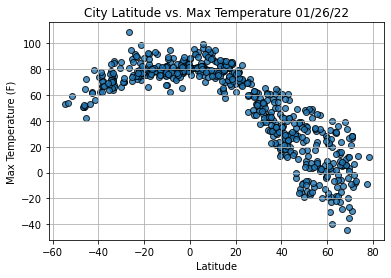

In [15]:
# build scatter plot for lat v max temp
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()

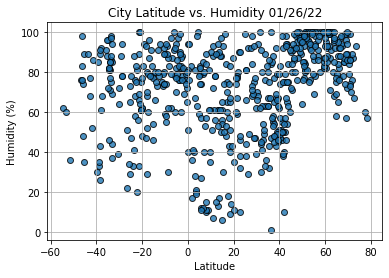

In [16]:
# build scatter plot for lat v humidity
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig2.png')

# show plot
plt.show()

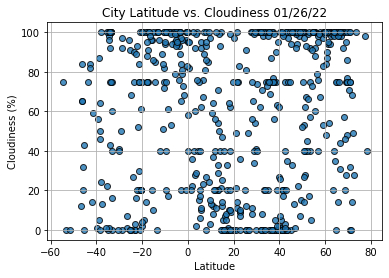

In [17]:
# build scatter plot for lat v cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig3.png')

# show plot
plt.show()

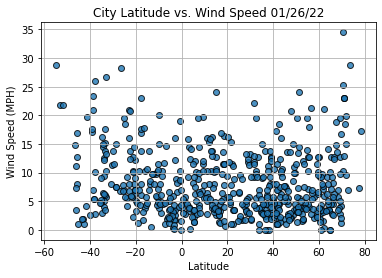

In [18]:
# build scatter plot for lat v wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# incorporate other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)

# save the fig
plt.savefig('weather_data/Fig4.png')

# show plot
plt.show()

In [56]:
# import linregress
from scipy.stats import linregress

# create a function to perform linear regression on weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # calc the regression line 'y values' from the slope & intercept
    regress_values = x_values * slope + intercept
    
    # get the line equation
    line_eq = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)) + '\nr= ' + str(round(r_value, 2))
    
    # create a scatter plot and plot the regression line
                                                         
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # annotate the text for the line eq
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2022-01-26 16:12:10
Lat                       19.7297
Lng                       -155.09
Max Temp                    68.25
Humidity                       87
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [25]:
# create northern and southern hemisphere dfs
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

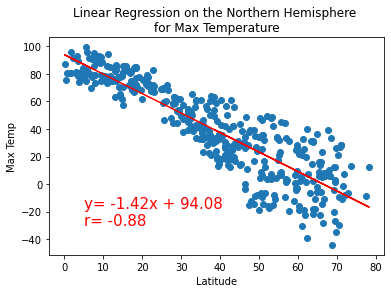

In [57]:
# linear regression on the northern hemisphere - max temp
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
text_coordinates = (5, -30)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Max Temperature', 'Max Temp', text_coordinates)

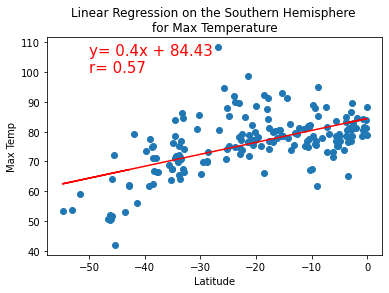

In [58]:
# linear regression on the southern hemisphere - max temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
text_coordinates = (-50, 100)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Max Temperature', 'Max Temp', text_coordinates)

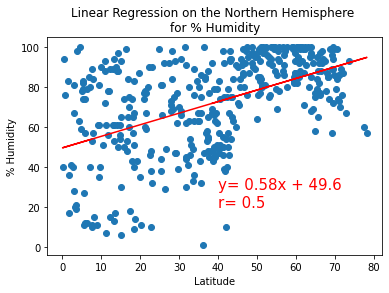

In [59]:
# linear regression on the northern hemisphere - humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
text_coordinates = (40, 20)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity', text_coordinates)

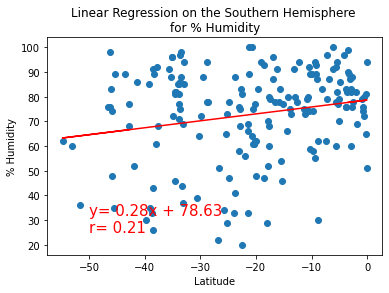

In [60]:
# linear regression on the southern hemisphere - humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
text_coordinates = (-50, 25)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity', text_coordinates)

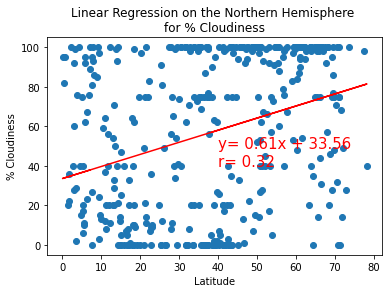

In [62]:
# linear regression on the northern hemisphere - cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
text_coordinates = (40, 40)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness', text_coordinates)

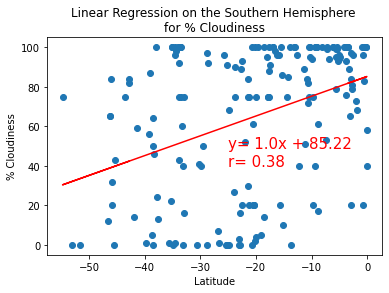

In [64]:
# linear regression on the southern hemisphere - cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
text_coordinates = (-25, 40)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness', text_coordinates)

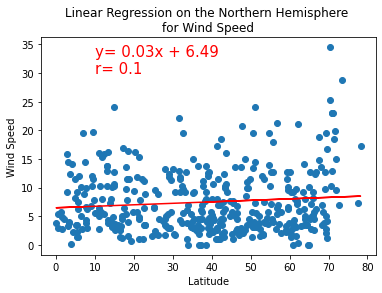

In [66]:
# linear regression on the northern hemisphere - wind speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
text_coordinates = (10, 30)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed', text_coordinates)

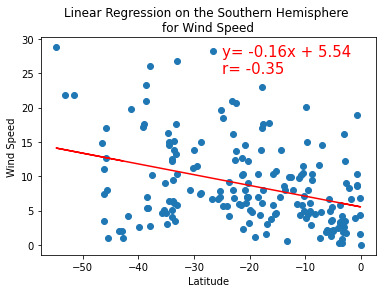

In [69]:
# linear regression on the southern hemisphere - wind speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
text_coordinates = (-25, 25)

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed', text_coordinates)